In [24]:
!pip install keras

In [25]:
!pip install seaborn

In [26]:
!pip install keras==2.3.1

In [27]:
!pip install tensorflow

In [28]:
!pip install notebook

In [29]:
import os

In [30]:
import numpy as np # linear algebra
import pandas as pd
import sys
import seaborn as sns
import os
import keras
from keras.applications.vgg16 import VGG16
from keras_applications import vgg16
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
#from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [31]:
traindir = "train"
validdir = "valid"
testdir = "test"

In [32]:
td = os.listdir(traindir)
len(td)

39

In [33]:
vd = os.listdir(validdir)
len(vd)

38

In [34]:
tdd = os.listdir(testdir)
len(tdd)

33

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

In [13]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
batch_size = 128
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [15]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [16]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [17]:
li = list(class_dict.keys())
print(li)

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [56]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [59]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [58]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [60]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [61]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [62]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [63]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [64]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [65]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [66]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [67]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


In [68]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [69]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


In [70]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [71]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


In [72]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [73]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


In [74]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [75]:
model.add(Flatten())

In [76]:
model.add(Dense(units=4096,activation="relu"))

In [77]:
model.add(Dense(units=4096,activation="relu"))

In [78]:
model.add(Dense(units=2, activation="softmax"))


In [79]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [81]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [90]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=5,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/5
549/549 [==============================] - 4267s 8s/step - loss: 0.3428 - accuracy: 0.8894 - val_loss: 0.2594 - val_accuracy: 0.9251
Epoch 2/5
549/549 [==============================] - 4253s 8s/step - loss: 0.2984 - accuracy: 0.9046 - val_loss: 0.3559 - val_accuracy: 0.9070
Epoch 3/5
549/549 [==============================] - 4263s 8s/step - loss: 0.2883 - accuracy: 0.9094 - val_loss: 0.3366 - val_accuracy: 0.9222
Epoch 4/5
549/549 [==============================] - 4253s 8s/step - loss: 0.2641 - accuracy: 0.9187 - val_loss: 0.2196 - val_accuracy: 0.9119
Epoch 5/5
549/549 [==============================] - 4257s 8s/step - loss: 0.2538 - accuracy: 0.9217 - val_loss: 0.1507 - val_accuracy: 0.9303


In [92]:
#Saving our model
filepath="Mymodel.h5"
classifier.save(filepath)

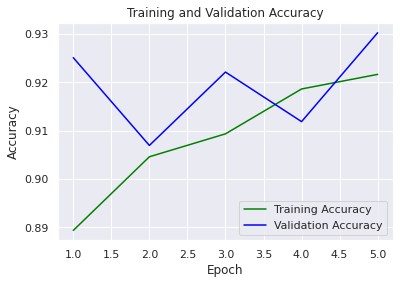

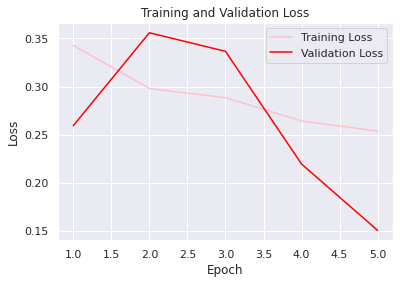

In [93]:
#Visualizing the Accuracy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:


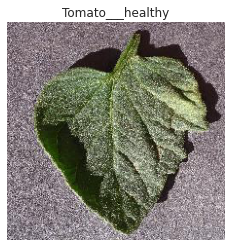

In [94]:
#predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "test/TomatoHealthy1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255 

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


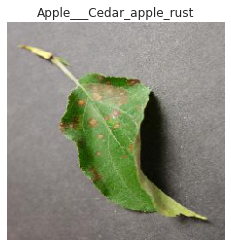

In [96]:
#predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "test/AppleCedarRust3.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


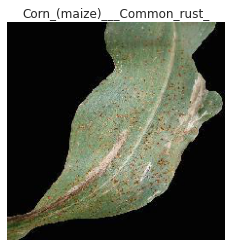

In [97]:
#predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "test/CornCommonRust1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


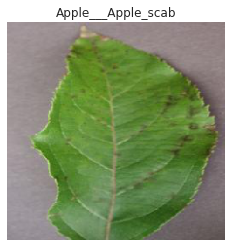

In [98]:
#predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "test/AppleScab1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()